## Ejercicio 1

1.1 **Una senoidal** que responda a la ecuación:  
   $$ y[n] = \sin(2\pi f_s t + \phi) $$  
   donde $t$ es la variable de tiempo discreto, con paso $\frac{1}{f_{m}}$,  $f_{m}$ es la frecuencia de muestreo,  $f_{s}$ es la frecuencia de la senoidal,  y $\phi$ en $-\pi, \pi$ su fase.

   Las tres funciones deben permitir elegir el intervalo de tiempo que se desea muestrear, definido desde tiempo inicial a tiempo final. Una vez generadas estas funciones, pruebelas utilizando una frecuencia de muestreo de $100 Hz$, un intervalo de tiempo de $[0, 1]$ y distintos valores para la $f_{s}$ y la fase $\phi$. Respete la relación $2f_{s} ≤ f_{m}$ para determinar los valores de las frecuencias

   La señal cuya frecuencia $f_{s}$ es de $50 Hz$ si bien cumple con el teorema de muestreo, al estar en el limite, pasan cosas raras y la señal no se llega a reconstruir bien ya que el muestreo cae donde la señal puede no estar bien representada 

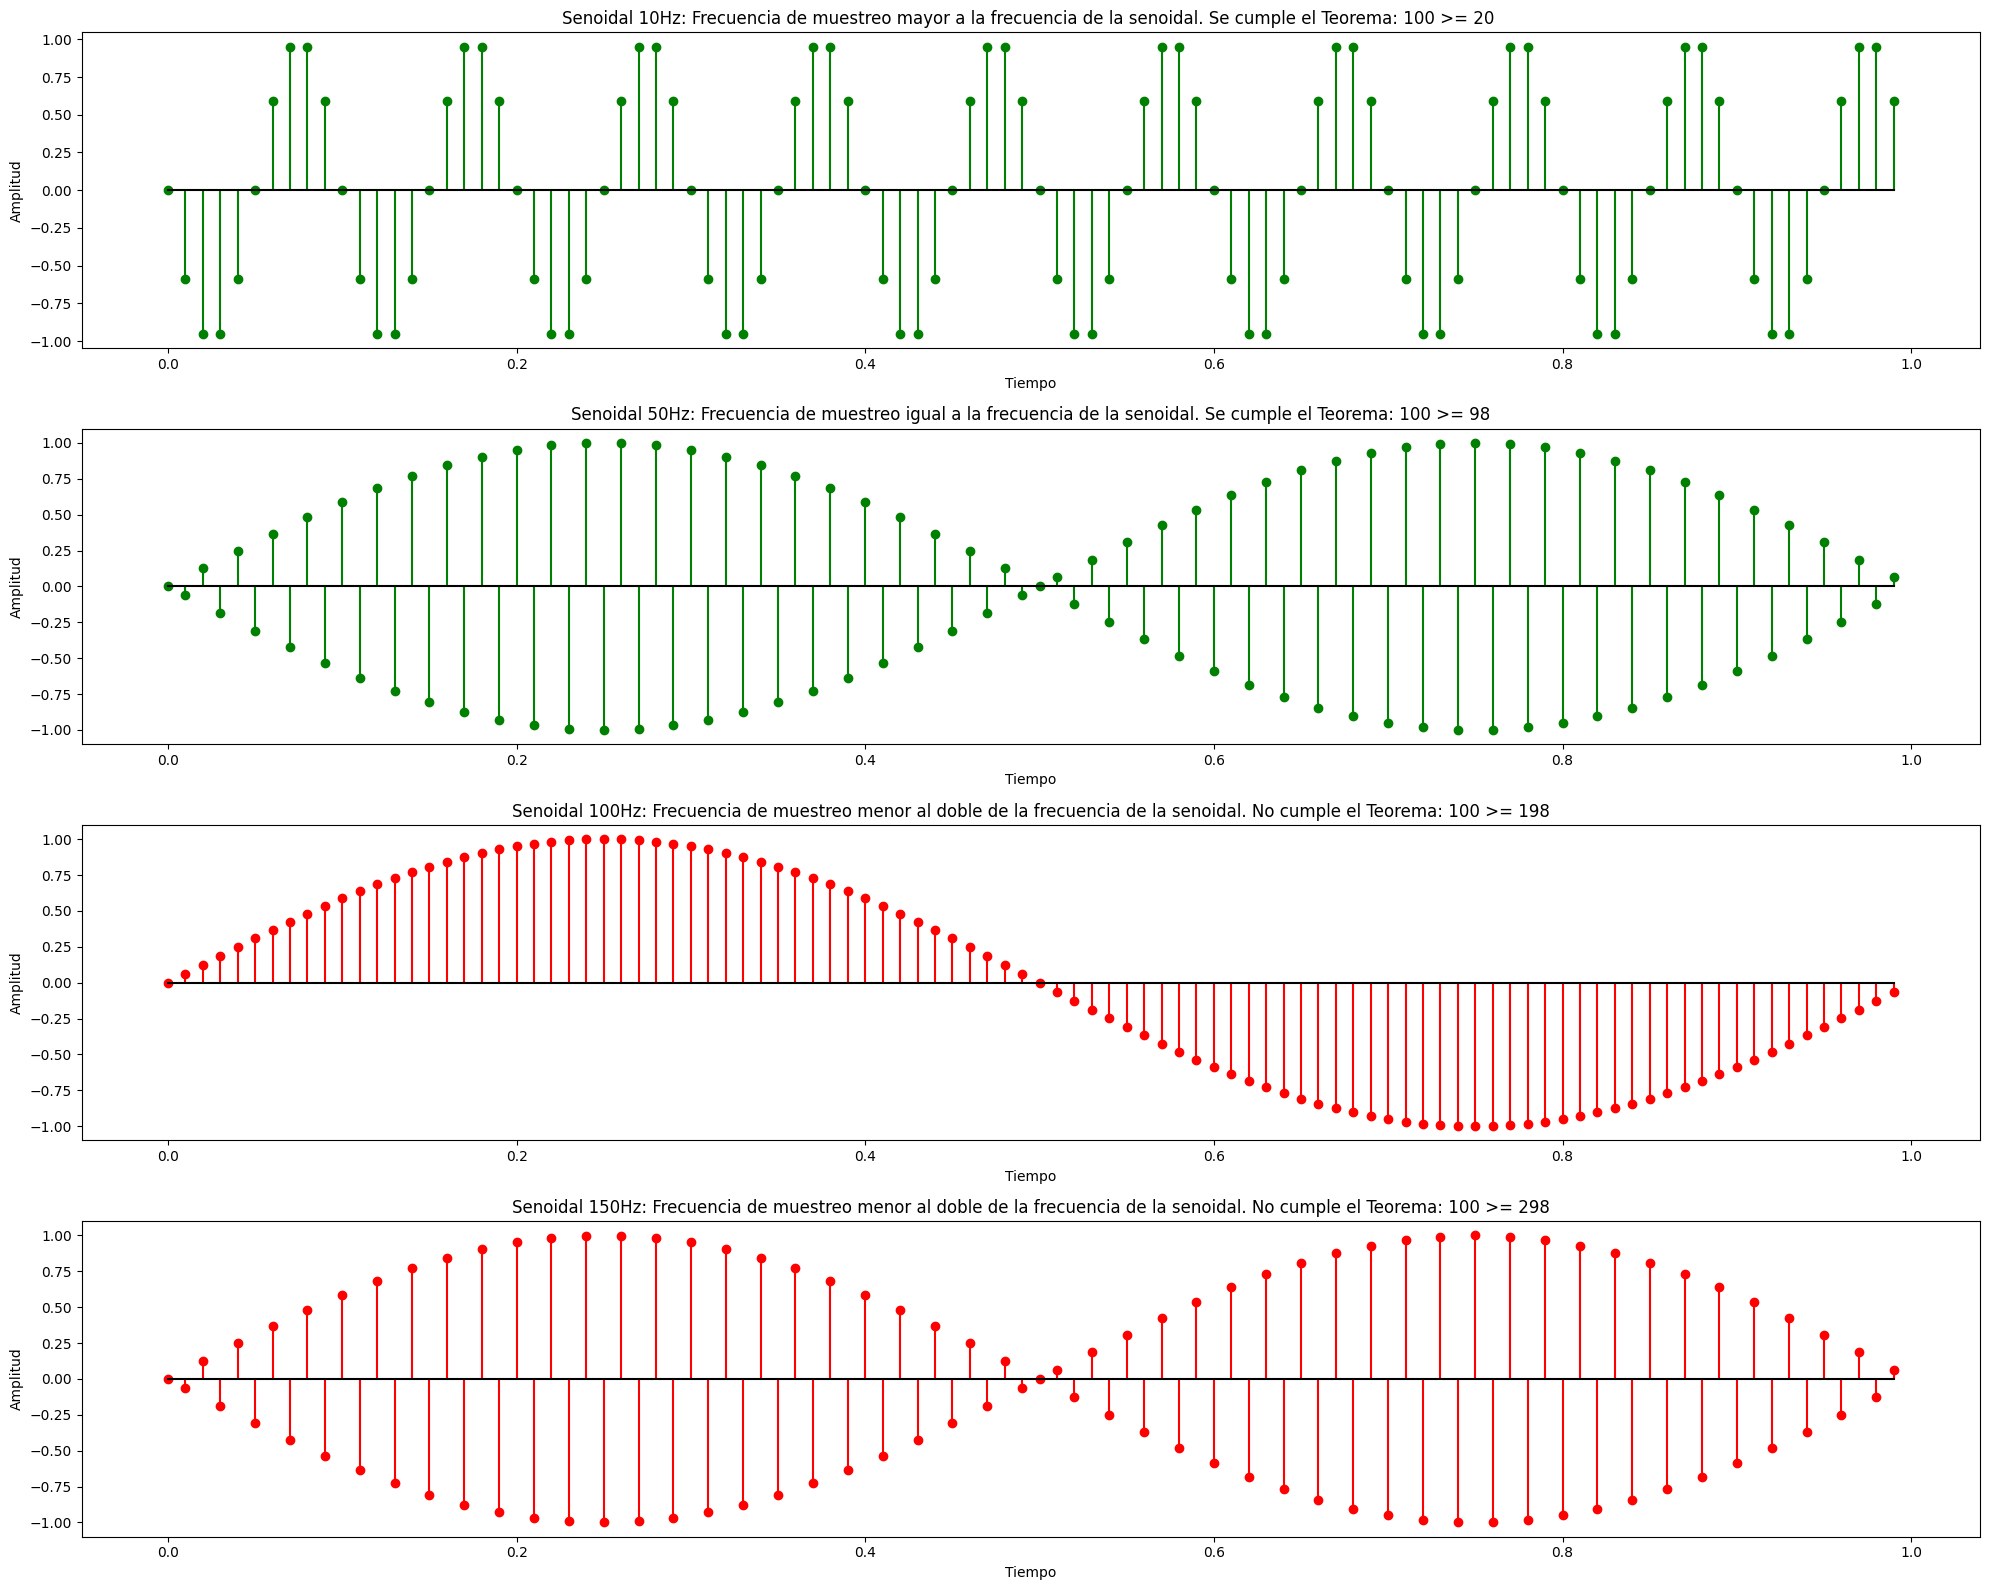

In [50]:
import numpy as np
import matplotlib.pyplot as plt

#linespace es distinto arange y en una se calculo el preiodo de muestro Ts, como se dijo en la clase, y los resultados son distintos.
#Para analizar.
#def senoidal(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo, fase):
#    tiempo = np.linspace(tiempo_inicial, tiempo_final, frecuencia_senoidal)
#    y = np.sin(2 * np.pi * frecuencia_muestreo * tiempo + fase)
#    return tiempo, y


def senoidal(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo, fase):
    Ts = 1 / frecuencia_muestreo  # Período de muestreo
    tiempo = np.arange(tiempo_inicial, tiempo_final, Ts)  # Instantes de muestreo
    y = np.sin(2 * np.pi * frecuencia_senoidal * tiempo + fase)  # Señal muestreada
    return tiempo, y

tiempo1, y1 = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=10, frecuencia_muestreo=100, fase=np.pi)
# tiempo1supermuestreado, y1supermuestreado = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=10, frecuencia_muestreo=1000, fase=np.pi)
tiempo2, y2 = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=49, frecuencia_muestreo=100, fase=np.pi)
# tiempo2supermuestreado, y2supermuestreado = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=49, frecuencia_muestreo=1000, fase=np.pi)
tiempo3, y3 = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=99, frecuencia_muestreo=100, fase=np.pi)
# tiempo3supermuestreado, y3supermuestreado = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=99, frecuencia_muestreo=1000, fase=np.pi)
tiempo4, y4 = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=149, frecuencia_muestreo=100, fase=np.pi)
# tiempo4supermuestreado, y4supermuestreado = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=149, frecuencia_muestreo=1000, fase=np.pi)

plt.figure(figsize=(20, 16))

plt.subplot(4, 1, 1)
# plt.plot(tiempo1supermuestreado, y1supermuestreado)
plt.stem(tiempo1, y1, linefmt='g-', markerfmt='go', basefmt='k-')
plt.title("Senoidal 10Hz: Frecuencia de muestreo mayor a la frecuencia de la senoidal. Se cumple el Teorema: 100 >= 20 ")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

plt.subplot(4, 1, 2)
# plt.plot(tiempo2supermuestreado, y2supermuestreado)
plt.stem(tiempo2, y2, linefmt='g-', markerfmt='go', basefmt='k-')
plt.title("Senoidal 50Hz: Frecuencia de muestreo igual a la frecuencia de la senoidal. Se cumple el Teorema: 100 >= 98")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

plt.subplot(4, 1, 3)
# plt.plot(tiempo3supermuestreado, y3supermuestreado)
plt.stem(tiempo3, y3, linefmt='r-', markerfmt='ro', basefmt='k-')
plt.title("Senoidal 100Hz: Frecuencia de muestreo menor al doble de la frecuencia de la senoidal. No cumple el Teorema: 100 >= 198")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

plt.subplot(4, 1, 4)
# plt.plot(tiempo4supermuestreado, y4supermuestreado)
plt.stem(tiempo4, y4, linefmt='r-', markerfmt='ro', basefmt='k-')
plt.title("Senoidal 150Hz: Frecuencia de muestreo menor al doble de la frecuencia de la senoidal. No cumple el Teorema: 100 >= 298")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")


plt.tight_layout()
plt.show()


1.2 **Una señal sinc**, definida como:  
   $$
   \text{sinc}(x) =
   \begin{cases} 
   \frac{\sin(x)}{x}, & \text{si } x \neq 0 \\
   1, & \text{si } x = 0
   \end{cases}
   $$  
   considerando  $x = 2\pi f_{s} t$, con $f_{s}$ perteniciendo a los Reales y $t$  $(-1, 1)$.  
   Las tres funciones deben permitir elegir el intervalo de tiempo que se desea muestrear, definido desde tinicial a tiempo_final inal. Una vez generadas estas funciones, pru´ebelas utilizando una frecuencia de muestreo de $100 Hz$, un intervalo de tiempo de $[0, 1]$ y distintos valores para la $f_{s}$ y la fase $\phi$. Respete la relación $2f_{s} ≤ f_{m}$ para determinar los valores de las frecuencias


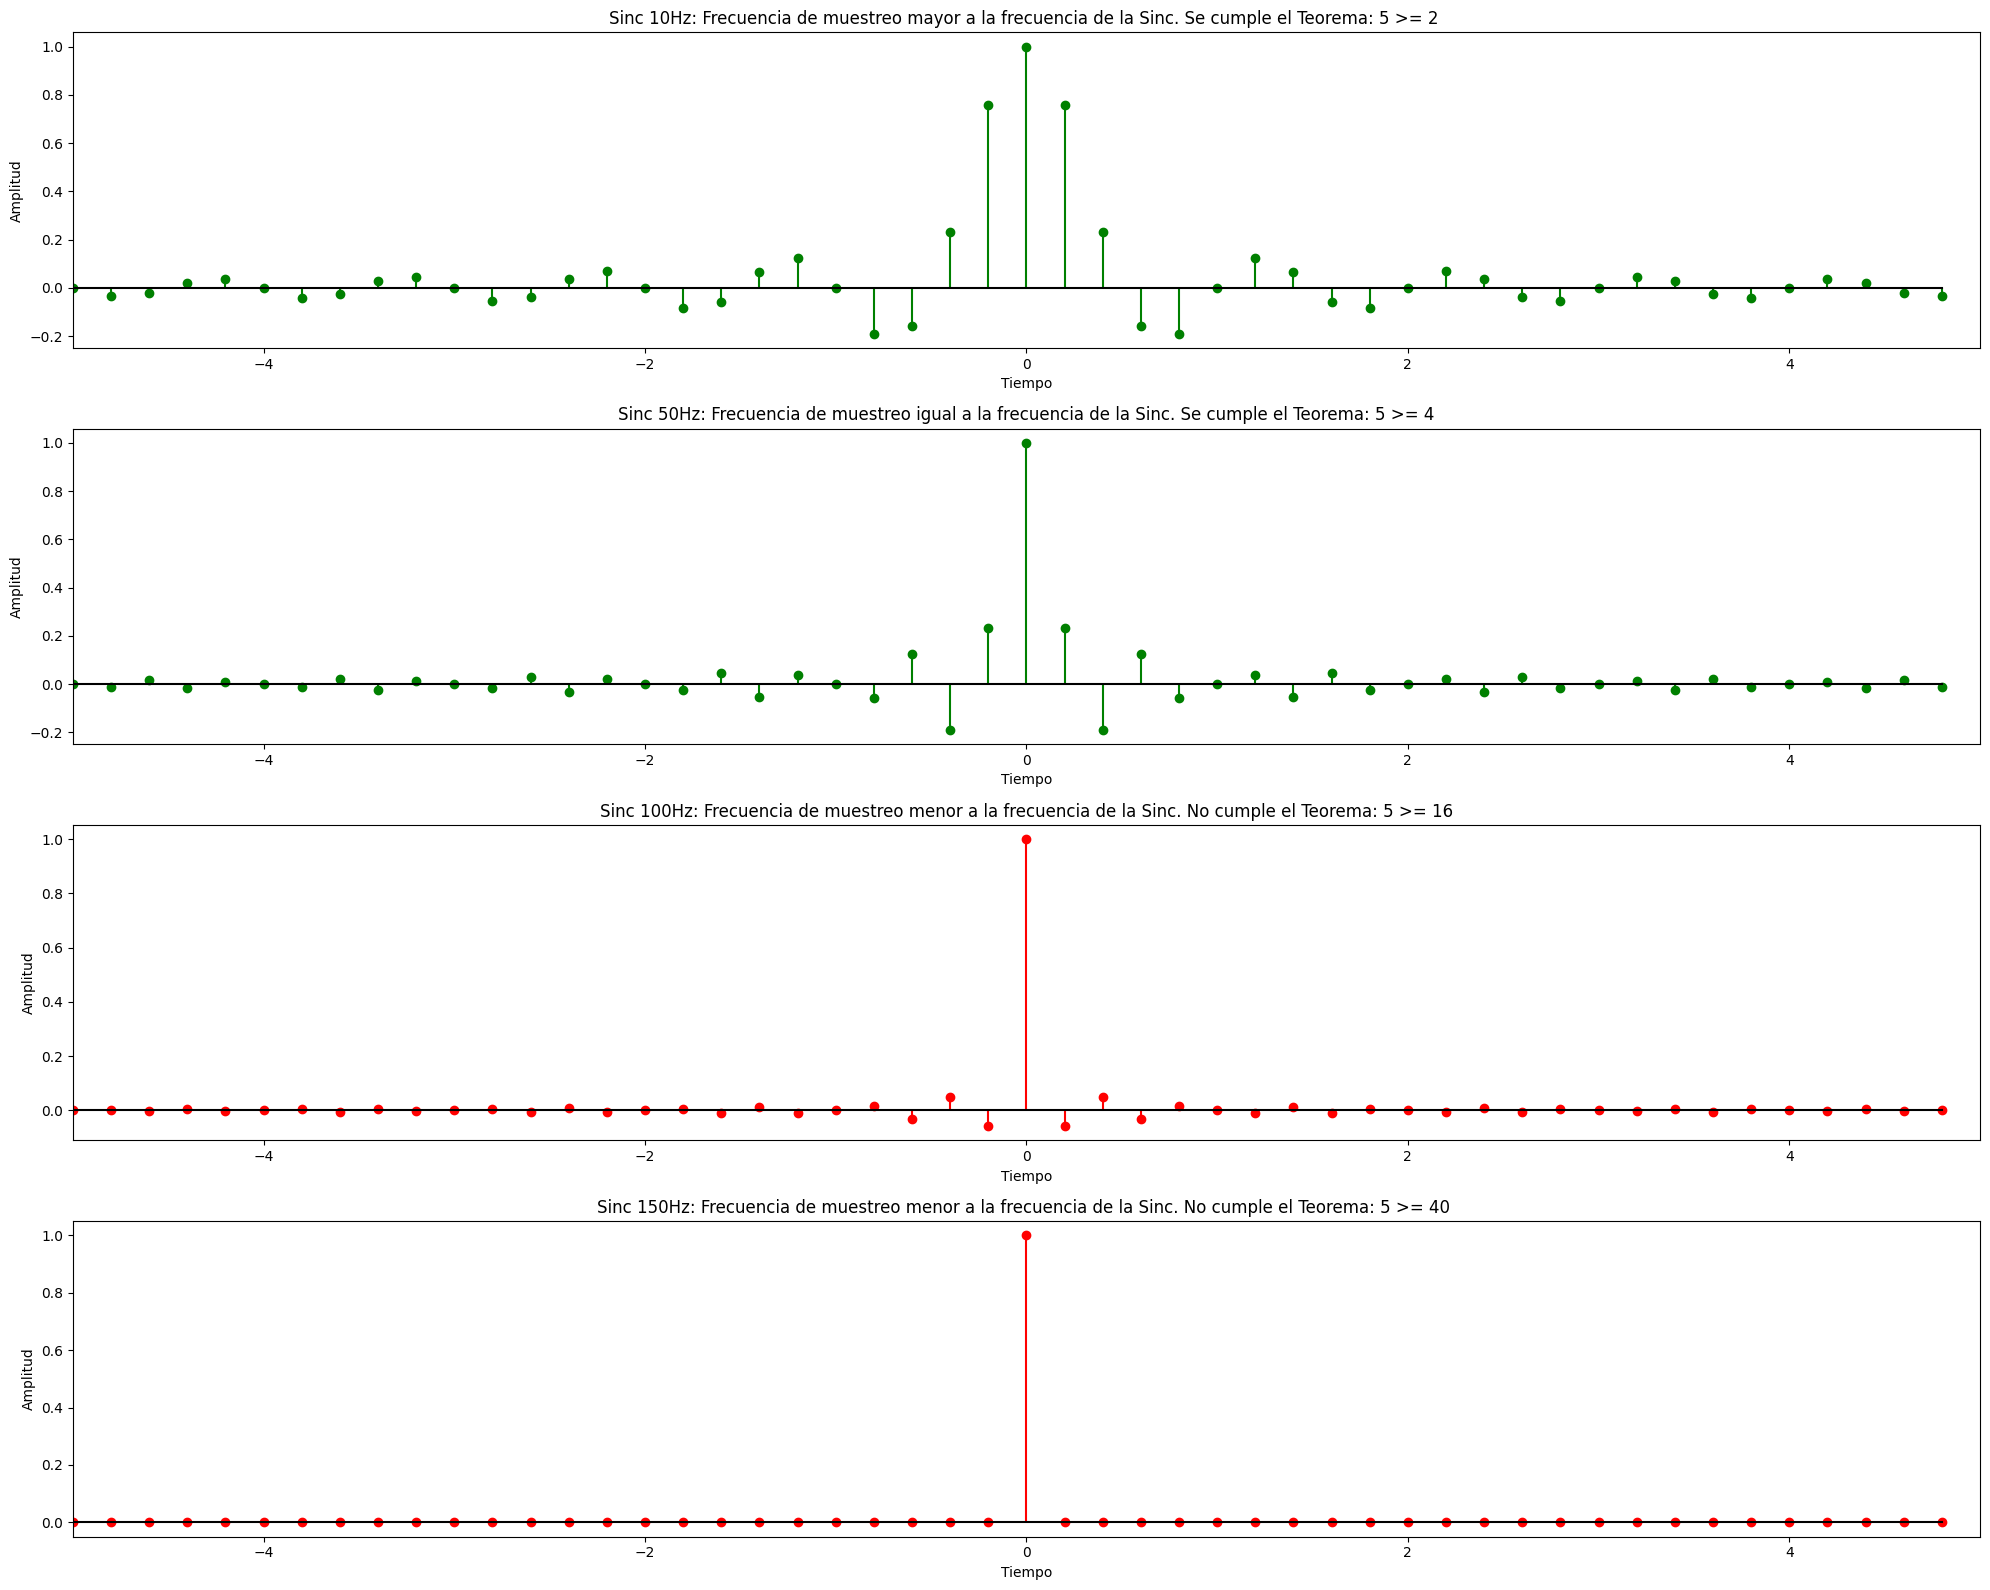

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def sinc(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo):
    T = 1/frecuencia_muestreo
    t = np.arange(tiempo_inicial,tiempo_final, T)

    y = np.zeros(len(t))

    for i in range(len(y)):
        if t[i] != 0:
            x = t[i] * 2 * np.pi * frecuencia_senoidal
            y[i] = np.sin(x)/(x)
            # dividido 2*pi*t porque sino "y" no queda entre [-1,1] 
        else:
            y[i] = 1

    return t, y



tiempo1, y1 = sinc(tiempo_inicial=-5, tiempo_final=5, frecuencia_senoidal=1, frecuencia_muestreo=5)
### tiempo1supermuestreado, y1supermuestreado = sinc(tiempo_inicial=-10, tiempo_final=10, frecuencia_senoidal=1, frecuencia_muestreo=100)
tiempo2, y2 = sinc(tiempo_inicial=-5, tiempo_final=5, frecuencia_senoidal=2, frecuencia_muestreo=5)
### tiempo2supermuestreado, y2supermuestreado = sinc(tiempo_inicial=-10, tiempo_final=10, frecuencia_senoidal=2, frecuencia_muestreo=100)
tiempo3, y3 = sinc(tiempo_inicial=-5, tiempo_final=5, frecuencia_senoidal=8, frecuencia_muestreo=5)
### tiempo3supermuestreado, y3supermuestreado = sinc(tiempo_inicial=-10, tiempo_final=10, frecuencia_senoidal=8, frecuencia_muestreo=100)
tiempo4, y4 = sinc(tiempo_inicial=-5, tiempo_final=5, frecuencia_senoidal=20, frecuencia_muestreo=5)
### tiempo4supermuestreado, y4supermuestreado = sinc(tiempo_inicial=-10, tiempo_final=10, frecuencia_senoidal=20, frecuencia_muestreo=100)

plt.figure(figsize=(20, 16))

plt.subplot(4, 1, 1)
### plt.plot(tiempo1supermuestreado, y1supermuestreado)
plt.stem(tiempo1, y1, linefmt='g-', markerfmt='go', basefmt='k-')
plt.title("Sinc 10Hz: Frecuencia de muestreo mayor a la frecuencia de la Sinc. Se cumple el Teorema: 5 >= 2 ")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.xlim(-5, 5)  # Fija el intervalo de X

plt.subplot(4, 1, 2)
### plt.plot(tiempo2supermuestreado, y2supermuestreado)
plt.stem(tiempo2, y2, linefmt='g-', markerfmt='go', basefmt='k-')
plt.title("Sinc 50Hz: Frecuencia de muestreo igual a la frecuencia de la Sinc. Se cumple el Teorema: 5 >= 4")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.xlim(-5, 5)  # Fija el intervalo de X

plt.subplot(4, 1, 3)
### plt.plot(tiempo3supermuestreado, y3supermuestreado)
plt.stem(tiempo3, y3, linefmt='r-', markerfmt='ro', basefmt='k-')
plt.title("Sinc 100Hz: Frecuencia de muestreo menor a la frecuencia de la Sinc. No cumple el Teorema: 5 >= 16")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.xlim(-5, 5)  # Fija el intervalo de X

plt.subplot(4, 1, 4)
### plt.plot(tiempo4supermuestreado, y4supermuestreado)
plt.stem(tiempo4, y4, linefmt='r-', markerfmt='ro', basefmt='k-')
plt.title("Sinc 150Hz: Frecuencia de muestreo menor a la frecuencia de la Sinc. No cumple el Teorema: 5 >= 40 ")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.xlim(-5, 5)  # Fija el intervalo de X

plt.tight_layout()
plt.show()




1.3 **Una onda cuadrada**, que puede definirse de la siguiente manera:  
   $$
   c(t) =
   \begin{cases} 
   -1, & \text{si } \mod(2\pi f_s t + \phi, 2\pi) \geq \pi \\
   1, & \text{si } \mod(2\pi f_s t + \phi, 2\pi) < \pi
   \end{cases}
   $$  
   donde $t$ es la variable de tiempo discreto desde 0 hasta 1 segundo, con paso $\frac{1}{f_m}$,  $f_{m}$ $\in$ $\mathbb{R}$ es la frecuencia de muestreo,  $f_{s}$ $\in$ $\mathbb{R}$ es la frecuencia de la senoidal,  y $\phi$ $\in$ $(-\pi, \pi)$ su fase.  

Las tres funciones deben permitir elegir el intervalo de tiempo que se desea muestrear, definido desde tinicial a tiempo_final inal. Una vez generadas estas funciones, pru´ebelas utilizando una frecuencia de muestreo de $100 Hz$, un intervalo de tiempo de $[0, 1]$ y distintos valores para la $f_{s}$ y la fase $\phi$. Respete la relación $2f_{s} ≤ f_{m}$ para determinar los valores de las frecuencias


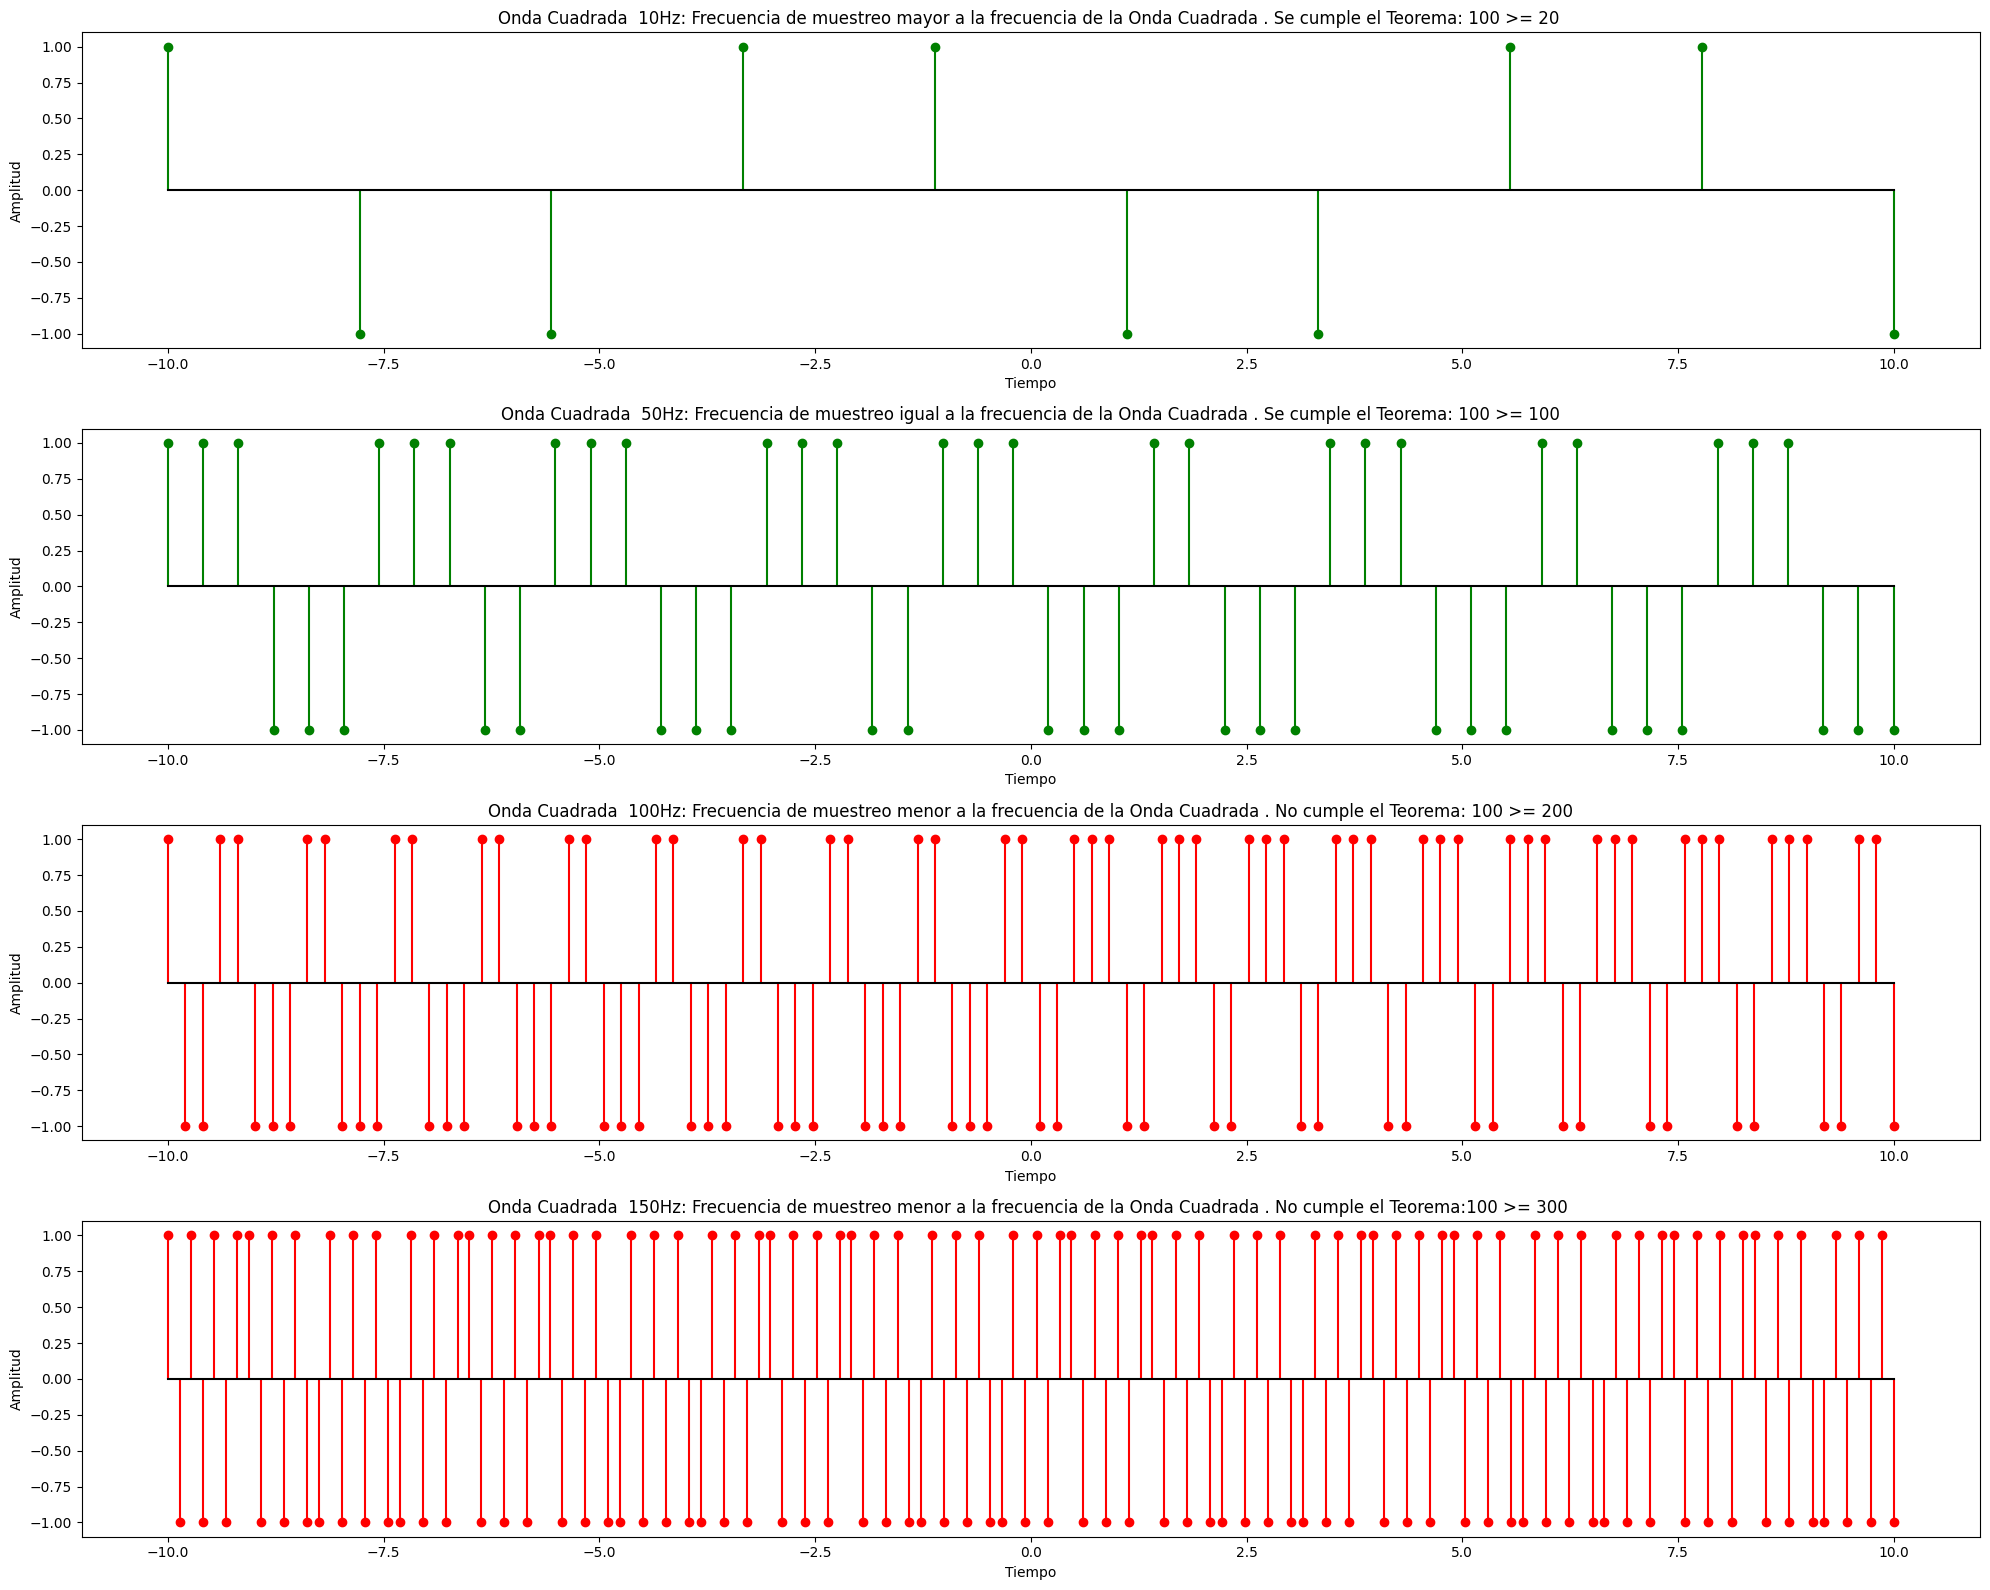

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def onda_cuadrada(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo, fase):
    T = 1/frecuencia_senoidal
    t = np.linspace(tiempo_inicial,tiempo_final,frecuencia_senoidal)
    y = np.zeros(len(t))

    for i in range(len(t)):
        if np.mod(2*np.pi*frecuencia_muestreo*t[i] + fase,2*np.pi) >= np.pi:
            y[i] = -1
        else:
            y[i] = 1

    return t, y

tiempo1, y1 = onda_cuadrada(tiempo_inicial=-10, tiempo_final=10, frecuencia_senoidal=10, frecuencia_muestreo=100,fase=np.pi)
tiempo2, y2 = onda_cuadrada(tiempo_inicial=-10, tiempo_final=10, frecuencia_senoidal=50, frecuencia_muestreo=100,fase=np.pi)
tiempo3, y3 = onda_cuadrada(tiempo_inicial=-10, tiempo_final=10, frecuencia_senoidal=100, frecuencia_muestreo=100,fase=np.pi)
tiempo4, y4 = onda_cuadrada(tiempo_inicial=-10, tiempo_final=10, frecuencia_senoidal=150, frecuencia_muestreo=100,fase=np.pi)
tiempo5, y5 = onda_cuadrada(tiempo_inicial=-10, tiempo_final=10, frecuencia_senoidal=200, frecuencia_muestreo=100,fase=np.pi)

plt.figure(figsize=(20, 16))

plt.subplot(4, 1, 1)
plt.stem(tiempo1, y1, linefmt='g-', markerfmt='go', basefmt='k-')
plt.title("Onda Cuadrada  10Hz: Frecuencia de muestreo mayor a la frecuencia de la Onda Cuadrada . Se cumple el Teorema: 100 >= 20 ")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

plt.subplot(4, 1, 2)
plt.stem(tiempo2, y2, linefmt='g-', markerfmt='go', basefmt='k-')
plt.title("Onda Cuadrada  50Hz: Frecuencia de muestreo igual a la frecuencia de la Onda Cuadrada . Se cumple el Teorema: 100 >= 100")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

plt.subplot(4, 1, 3)
plt.stem(tiempo3, y3, linefmt='r-', markerfmt='ro', basefmt='k-')
plt.title("Onda Cuadrada  100Hz: Frecuencia de muestreo menor a la frecuencia de la Onda Cuadrada . No cumple el Teorema: 100 >= 200")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

plt.subplot(4, 1, 4)
plt.stem(tiempo4, y4, linefmt='r-', markerfmt='ro', basefmt='k-')
plt.title("Onda Cuadrada  150Hz: Frecuencia de muestreo menor a la frecuencia de la Onda Cuadrada . No cumple el Teorema:100 >= 300 ")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

---
## Conclusiones ejercicio 1

Está mal expresada la formula por un error que dijo el profe en clase. Fs es la frecuencia de muestro y Fm la frecuencia de la señal. Dicho esto.
 + Linespace es distinto arange y en una se calculo el preiodo de muestro Ts, como se dijo en la clase, y los resultados son distintos. Creo que la segunda senoidal es la correcta.
 + El Torema de Muestro parece que no se cumple muy bien cuando los valores son iguales, o al menos, no alcanza.
 + Si la regla establecida en el muestro NO SE CUMPLE, vemos cosas aliasing y una posible mal reconstruccion de la funcion. Figuras 3 y 4.
 + Si la regla establecida en el muestreo se cumple, vemos buenas cosas. En la Figura 1 y 2.
 + Me llama la atencion la figura uno, creo que es debido a que no usamos el mismo vector x o t para todos ?

---

## Ejercicio 2

Realice las siguientes operaciones básicas sobre una señal senoidal:

1. **Inversión**
2. **Rectificación**
3. **Cuantización en 8 niveles**

Para la cuantización, tenga en cuenta la ecuación de cuantizador que aparece en el libro:

$$
\rho(t) =
\begin{cases}
0 & \text{si } x < 0, \\
\text{Hint}\left(\frac{x}{H}\right) & \text{si } 0 \leq x < (N - 1)H, \\
(N - 1)H & \text{si } x \geq (N - 1)H,
\end{cases}
$$

donde $N$ es el número de niveles de la cuantización, y $H$ es la magnitud del cuanto o paso. La ecuación está diseñada para funcionar solo sobre señales positivas, ya que elimina la parte negativa.

Esto quiere decir que para la señal senoidal, que tiene parte negativa, el método debe adaptarse. Una forma sencilla de realizar esto es hacer la señal toda positiva (restando el mínimo), aplicar la fórmula anterior, y luego sumar el mínimo para volver a dejar la señal en el rango de valores original.


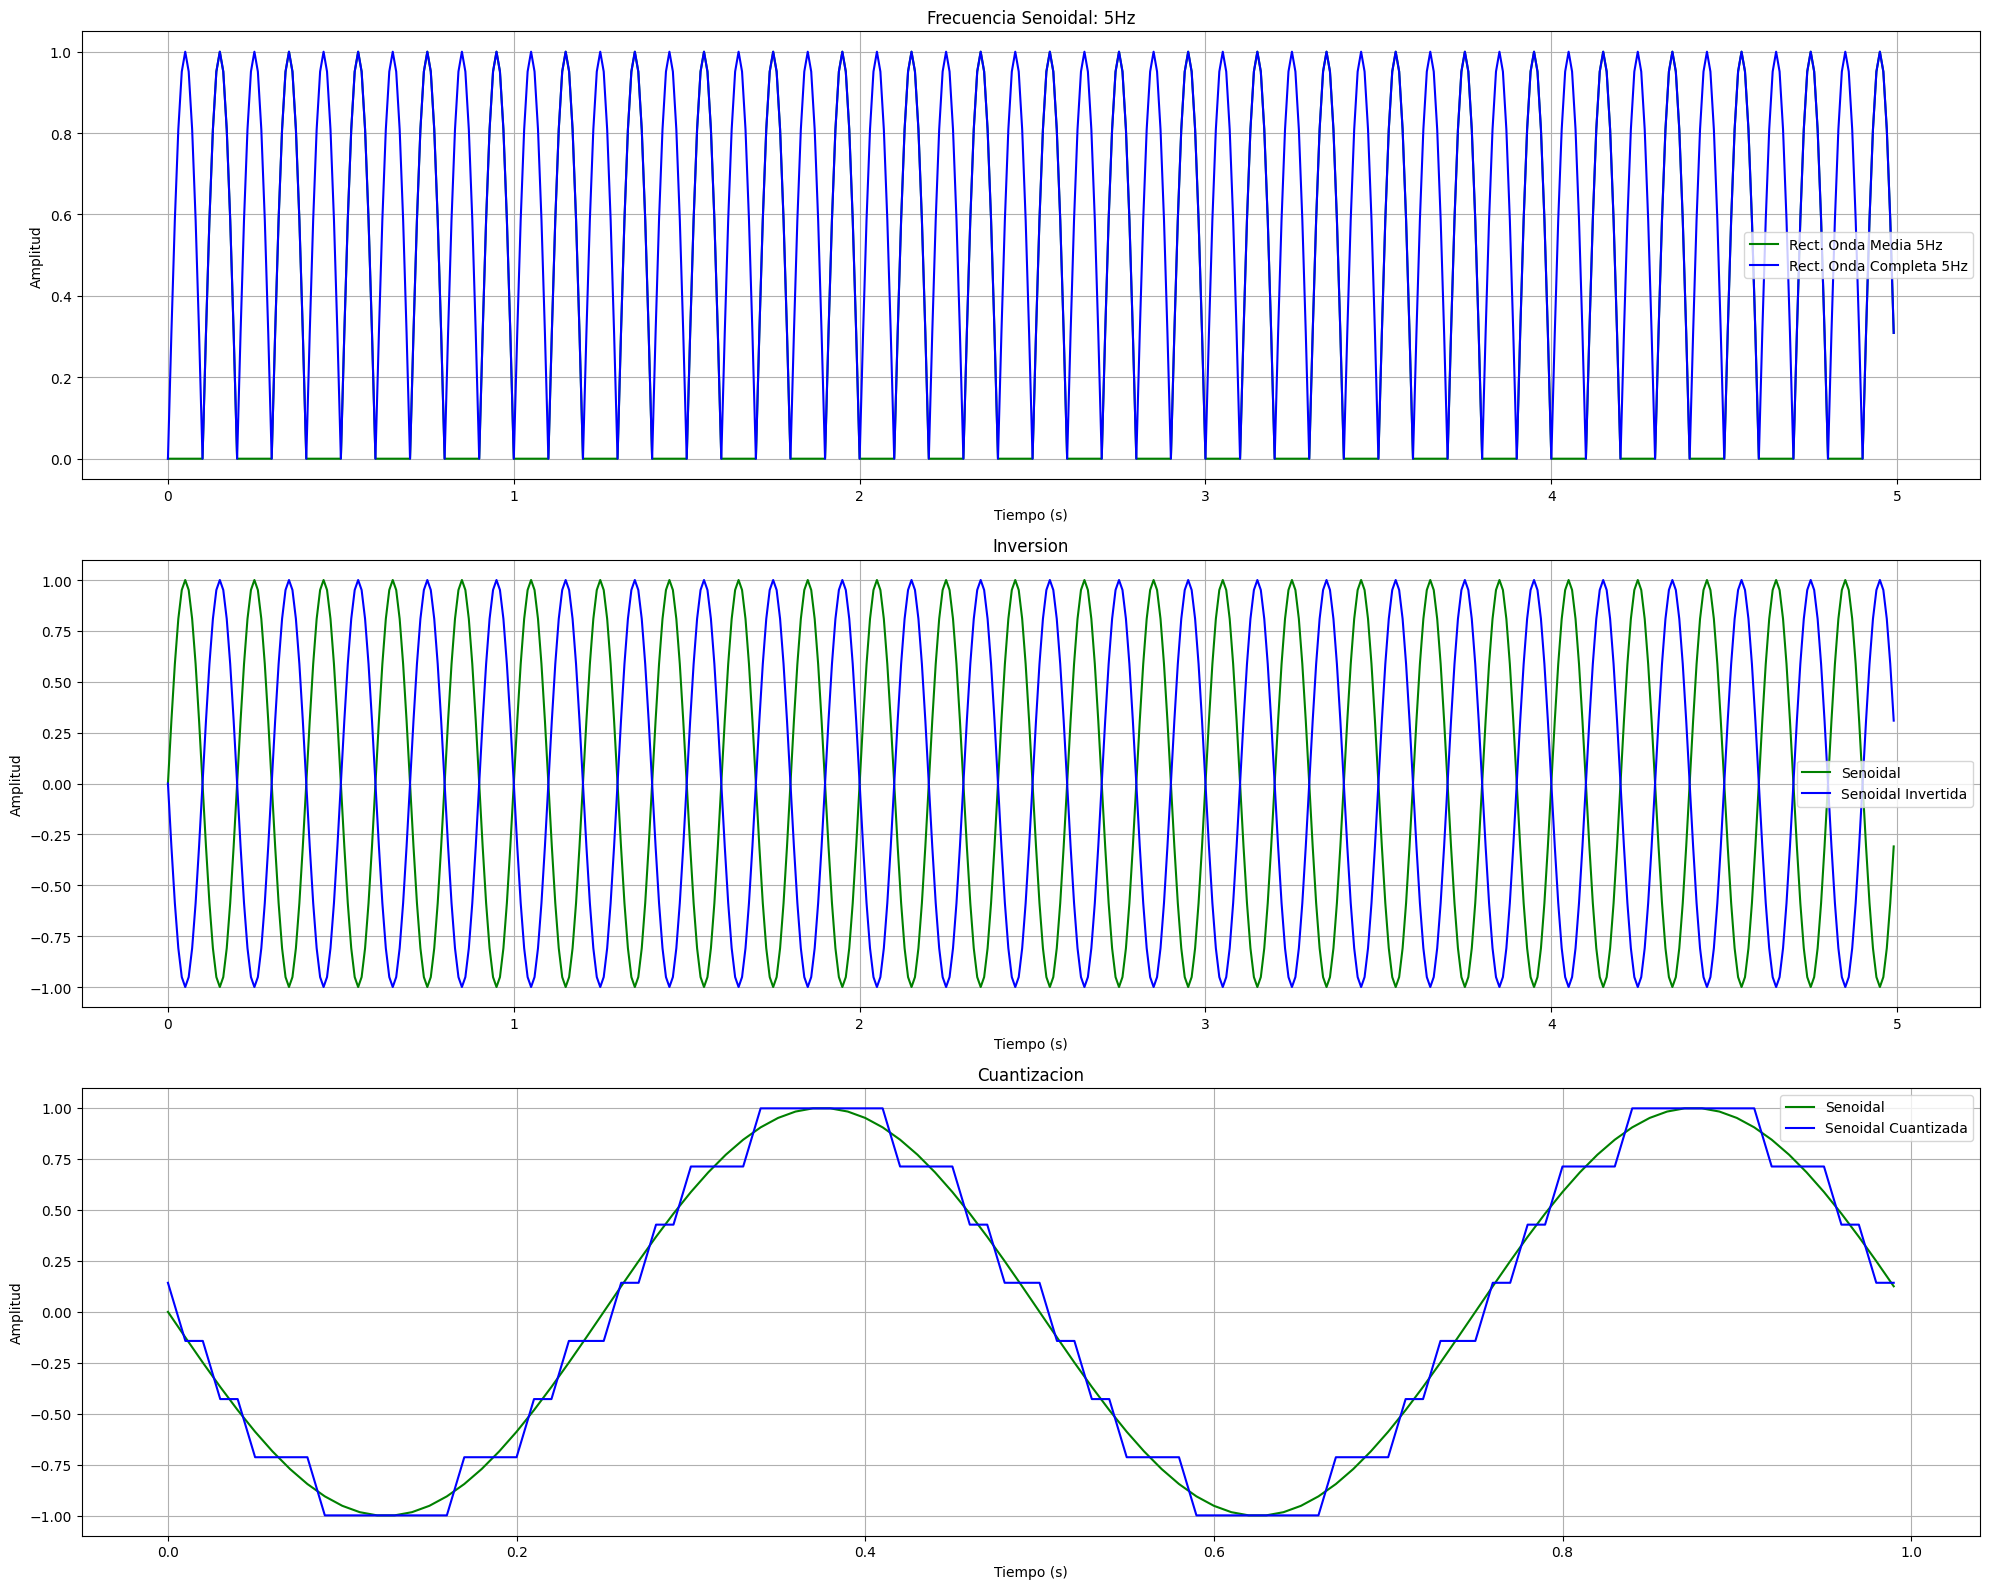

In [53]:
import numpy as np
import matplotlib.pyplot as plt


def rectificacion(tiempo_final, tiempo_inicial, frecuencia_senoidal, frecuencia_muestreo, fase):
    t, y = senoidal(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo, fase)

    yrec1 = np.zeros(len(y))  # Rectificación de onda media
    yrec2 = np.zeros(len(y))  # Rectificación de onda completa

    for i in range(len(t)):
        if y[i] < 0:
            yrec1[i] = 0
            yrec2[i] = -y[i]  
        else:
            yrec1[i] = y[i]   
            yrec2[i] = y[i]   

    return t, yrec1, yrec2


def inversion(tiempo_final, tiempo_inicial, frecuencia_senoidal, frecuencia_muestreo, fase):
    t, y = senoidal(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo, fase)
    yinv = -y #Esta seria una manera de invertirla
    return t, yinv, y


def cuantizacion(tiempo_final, tiempo_inicial, frecuencia_senoidal, frecuencia_muestreo, fase):
    t, y = senoidal(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo, fase)
    N = 8 #Cantidad de escalones
    max = np.max(y)
    min = np.min(y)
    dif = np.abs(max - min)
    H = dif/(N-1)

    if min < 0:
        y = y-min

    p = np.zeros(len(t))
    #Cuantizo de acuerdo a la formula del libro
    for i in range(len(t)):
        if y[i] < 0:
            p[i] = 0
        elif y[i] >= 0 and y[i] < (N - 1)*H:
            p[i] = H*np.round(y[i]/H)
        else:
            p[i] = (N - 1)*H

    y = y+min
    p = p+min

    return t, y , p

tiempo_inversion, y, y_invertida = inversion(tiempo_inicial=0, tiempo_final=5, frecuencia_senoidal=5, frecuencia_muestreo=100,fase=np.pi)
tiempo_rectificacion, y_mediaonda, y_ondacompleta = rectificacion(tiempo_inicial=0, tiempo_final=5, frecuencia_senoidal=5, frecuencia_muestreo=100,fase=np.pi)
tiempo_cuantizado, y_sin_cuantizar, y_cuantizado = cuantizacion(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=2, frecuencia_muestreo=100,fase=np.pi)

plt.figure(figsize=(20, 16))

plt.subplot(3, 1, 1)
plt.plot(tiempo_rectificacion, y_mediaonda, 'g-', label='Rect. Onda Media 5Hz')
plt.plot(tiempo_rectificacion, y_ondacompleta, 'b-', label='Rect. Onda Completa 5Hz')
plt.title("Frecuencia Senoidal: 5Hz")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(tiempo_inversion, y, 'g-', label='Senoidal')
plt.plot(tiempo_inversion, y_invertida, 'b-', label='Senoidal Invertida')
plt.title("Inversion")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(tiempo_cuantizado, y_sin_cuantizar, 'g-', label='Senoidal')
plt.plot(tiempo_cuantizado, y_cuantizado, 'b-', label='Senoidal Cuantizada')
plt.title("Cuantizacion")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()





---
## Conclusiones ejercicio 2

 + Rectificacion: Consiste en que la senoidal deje de tener valores negativos. Existe la rectificacion de media onda que consiste en que los valores negativos pasan a valer cero y la rectificacion de onda completa es cuando los valores negativos se espejan y pasan a ser positivos.
 + Inversion: Se realiza una inversion temporal, por ejemplo si la señal consta de los siguientes valores [0 2 3 1] entonces la invertida pasa a valer [1 3 2 0].
 + Cuantizacion: La cuantización uniforme de 8 niveles es un proceso en el que un conjunto continuo de valores se divide en 8 intervalos de igual tamaño, y cada valor de entrada se asigna al valor representativo más cercano dentro de estos niveles. Como la funcion de cuantizacion sirve unicamente para valores positivos lo que se hace es restar el minimo para pasar todo a positivo. Basicamente se sigue la formula.

---

---
## Ejercicio 3 
La Figura 1 muestra la gráfica de una onda sinusoidal discreta. A partir del análisis de dicha gráfica, determine los valores numéricos (y unidades correspondientes) de amplitud (A), fase (phi), frecuencia (fs) y período de muestreo (Tm), que fueron utilizados para generar la se~nal mediante el siguiente código:
 + ```t=0:Tm:0.1-Tm```
 + ```x(t) = A*sin(2*pi*fs+phi)```
 + ```plot(t,x)```

Para detrminar el valor de la fase tenga en cuenta la relación $ϕ = −2πf_st_1$, donde $t_1$ indica el retardo temporal en segundos (en este caso el retardo temporal se puede determinar encontrando el primer cruce por cero de la sinusoidal).


---

<StemContainer object of 3 artists>

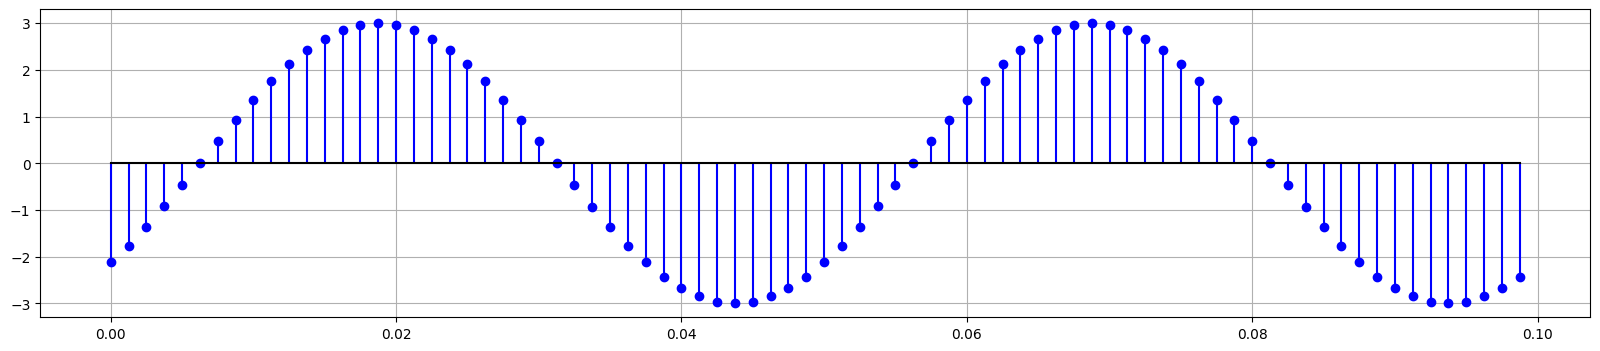

In [54]:
Amplitud = 3
t,y = senoidal(tiempo_inicial=0, tiempo_final=0.1, frecuencia_senoidal=20, frecuencia_muestreo=800, fase=-0.785)
plt.figure(figsize=(20, 4))
plt.grid()
plt.stem(t, Amplitud*y, linefmt='b-', markerfmt='bo', basefmt='k-')

---
## Conclusiones ejercicio 3
 + Amplitud (A) = $3$
 + Frecuencia de la señal $f_s = 20$. -> En la gráfica se observan 2 ciclos completos en 0.1 segundos por lo tanto $f_S = \frac{2}{0.1} = 20Hz$.
 + Frecuencia de muestreo $f_m = 800$. -> Son la cantidad de muestras por segundo que se toman. Mirando la gráfica podemos contar 40 muestras en un ciclo completo que se da en 0.05 segundos por lo tanto la frecuencia de muestreo es $f_m = \frac{40}{0.05} = 800$
 + Angulo de Fase $\phi \approx -0.785$. -> Siguiente con la ecuación dada en el enunciado $\phi =- 2 \pi f_s  t_1 $ siendo $t_1$, tenemos que en 0.01 segundos hay 8 muestras por lo tanto el periodo de muestreo es $T_m = \frac{0.01}{8}=0.00125$ y vemos que la gráfica está desfasada 5 lugares antes de iniciar en t=0 por lo tanto $t_1 = (5 \cdot 0.00125) = 0.00625$ por lo cual, $\phi = -2 \pi f_s  t_1 = 2\pi20 (-0.00625)  \approx -0.785 $

---

### Ejercicio 4  

Genere y grafique una señal senoidal discreta con frecuencia  $5$ $Hz$ y duración $1$ $segundo$ .  
Para ello, utilice las siguientes frecuencias de muestreo:  
[
$100$, $\quad 25$, $\quad 10$, $\quad 4$, $\quad 1$, $\quad 0.5$ $Hz$
]

Analice el resultado.  

1. ¿En qué casos la cantidad de ciclos que observa se corresponde con una sinusoidal de \( 5 \) Hz?  
2. ¿A qué se deben las discrepancias encontradas?


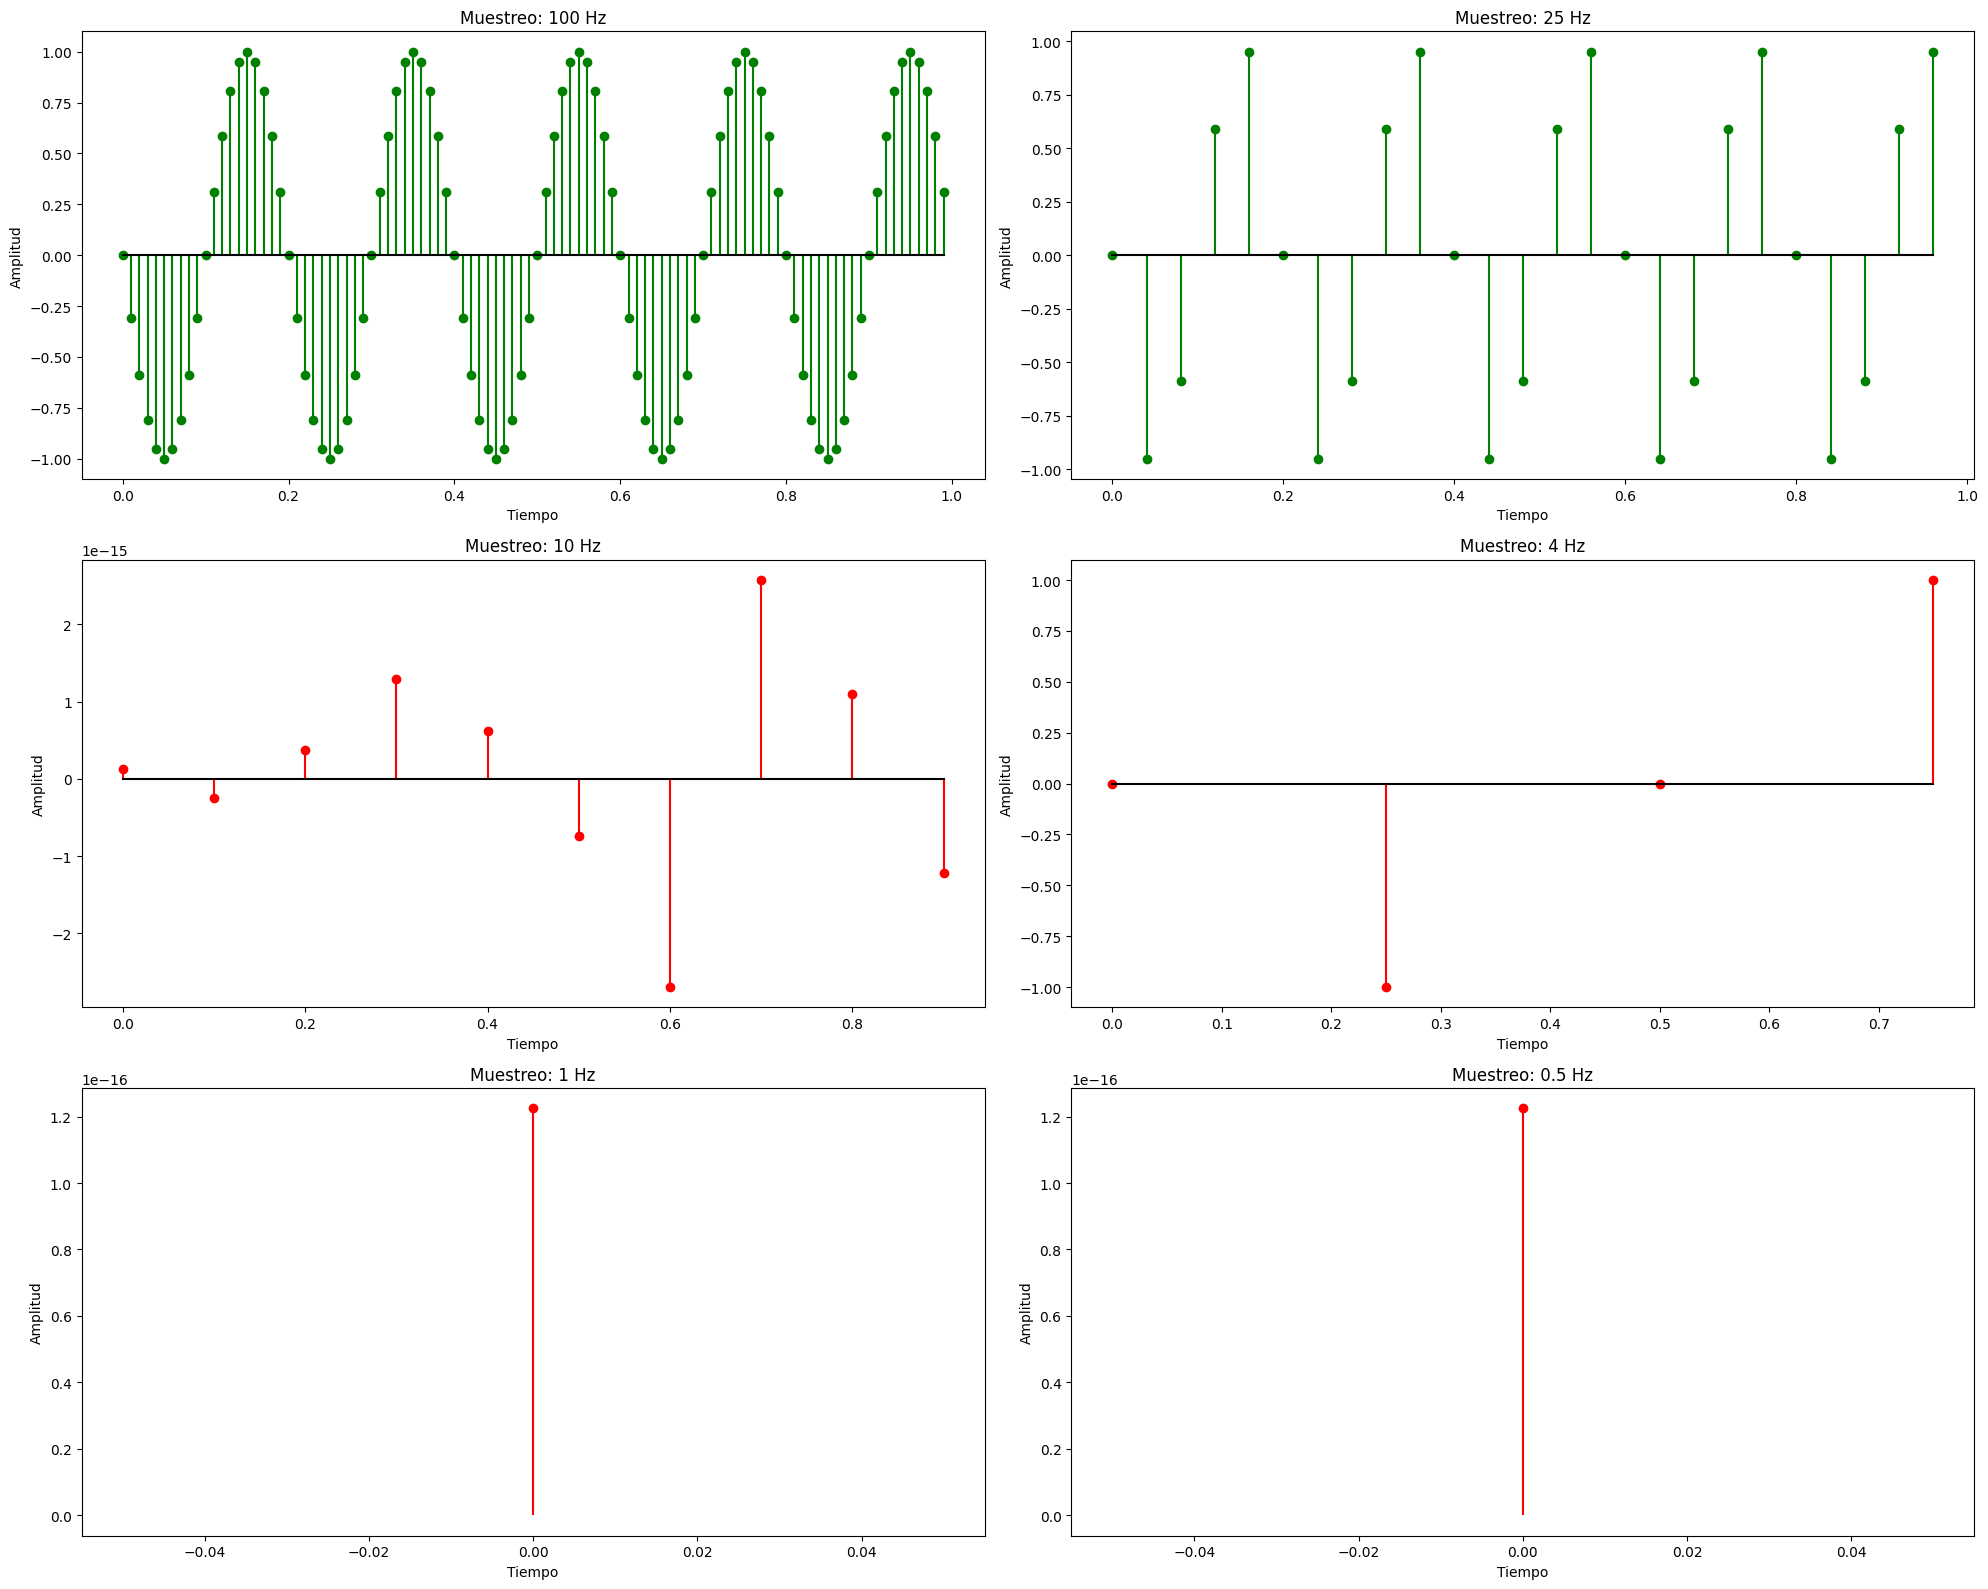

In [55]:
tiempo1, y1 = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=5, frecuencia_muestreo=100, fase=np.pi)
tiempo2, y2 = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=5, frecuencia_muestreo=25, fase=np.pi)
tiempo3, y3 = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=5, frecuencia_muestreo=10, fase=np.pi)
tiempo4, y4 = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=5, frecuencia_muestreo=4, fase=np.pi)
tiempo5, y5 = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=5, frecuencia_muestreo=1, fase=np.pi)
tiempo6, y6 = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=5, frecuencia_muestreo=.5, fase=np.pi)

plt.figure(figsize=(20, 16))

# Primera fila
plt.subplot(3, 2, 1)
plt.stem(tiempo1, y1, linefmt='g-', markerfmt='go', basefmt='k-')
plt.title("Muestreo: 100 Hz")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

plt.subplot(3, 2, 2)
plt.stem(tiempo2, y2, linefmt='g-', markerfmt='go', basefmt='k-')
plt.title("Muestreo: 25 Hz")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

# Segunda fila
plt.subplot(3, 2, 3)
plt.stem(tiempo3, y3, linefmt='r-', markerfmt='ro', basefmt='k-')
plt.title("Muestreo: 10 Hz")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

plt.subplot(3, 2, 4)
plt.stem(tiempo4, y4, linefmt='r-', markerfmt='ro', basefmt='k-')
plt.title("Muestreo: 4 Hz")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

# Tercera fila
plt.subplot(3, 2, 5)
plt.stem(tiempo5, y5, linefmt='r-', markerfmt='ro', basefmt='k-')
plt.title("Muestreo: 1 Hz")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

plt.subplot(3, 2, 6)
plt.stem(tiempo6, y6, linefmt='r-', markerfmt='ro', basefmt='k-')
plt.title("Muestreo: 0.5 Hz")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

---
## Conclusiones ejercicio 4

 Las primeras dos figuras tienen forma de una senoidal de 5 Hz (a chequear la segunda) ya que cumplen el teorema de muestreo, las otras figuras no corresponden ni podrian reconstruir una senoial de 5Hz ya que la cantidad de muestras es menor al doble de la frecuencia de la senoidal e incumple el teorema de muestreo.

---

### Ejercicio 5 

Genere y grafique una se˜nal senoidal con frecuencia 4000 Hz y duracin 2 seg., utilizando una frecuencia de muestreo de 129 Hz. Grafique elresultado y estime la frecuencia de la onda sinusoidal que se observa en la figura. Analice y obtenga conclusiones.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


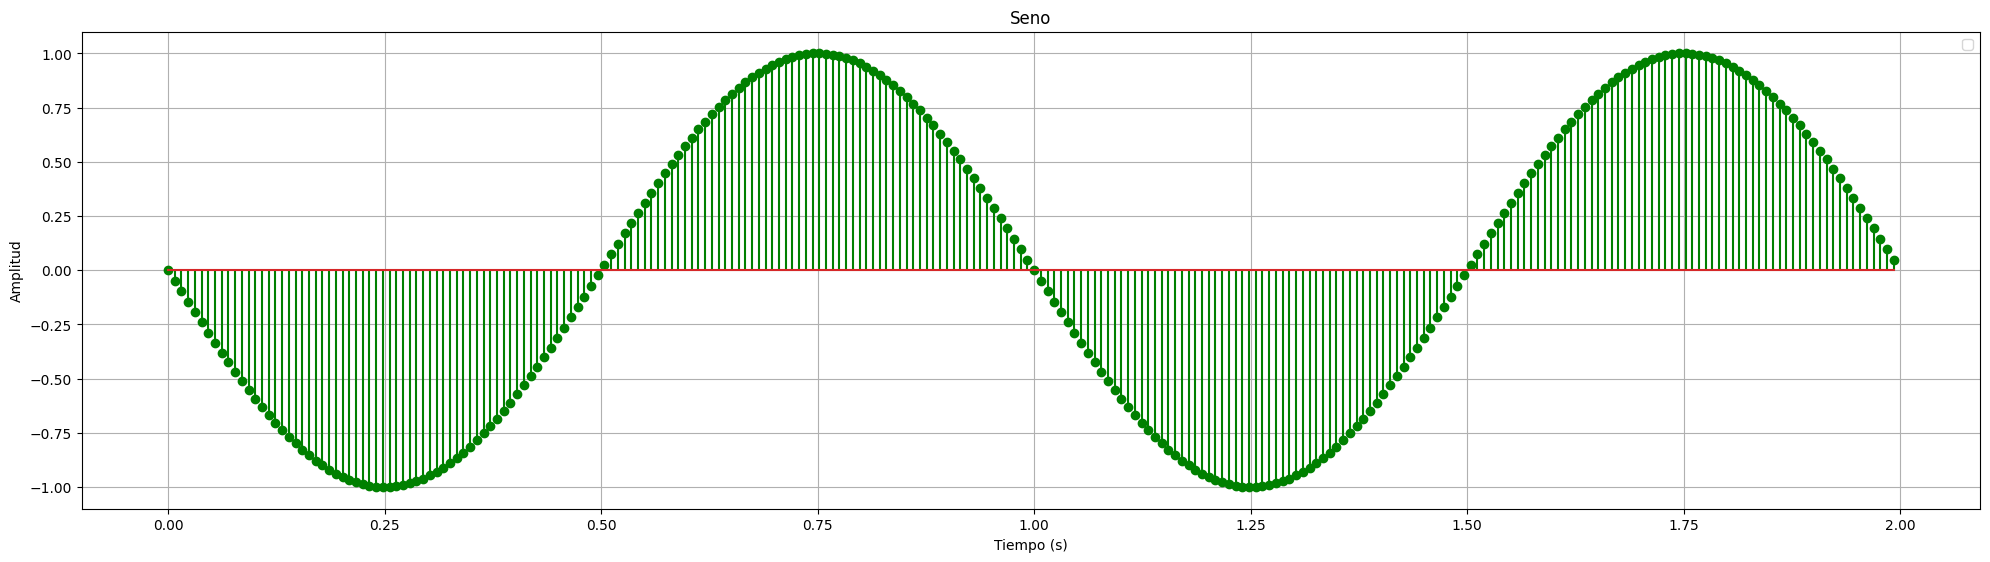

In [56]:
import numpy as np
import matplotlib.pyplot as plt


tiempo, y = senoidal(tiempo_inicial=0, tiempo_final=2, frecuencia_senoidal=4000, frecuencia_muestreo=129, fase=np.pi)


plt.figure(figsize=(20, 16))

plt.subplot(3, 1, 1)
plt.stem(tiempo, y, 'g-',)
plt.title("Seno")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()

---
## Conclusiones ejercicio 5

 1. La frecuencia que se observa de la señal es de 2 Hz, es un caso en el cual la frecuencia de muestreo no es suficiente para reconnstruir la señal original, esta señal esta afectada por lo que se conoce como efecto alias

 ![Efecto Alias.jpg](<attachment:Efecto Alias.jpg>)

---
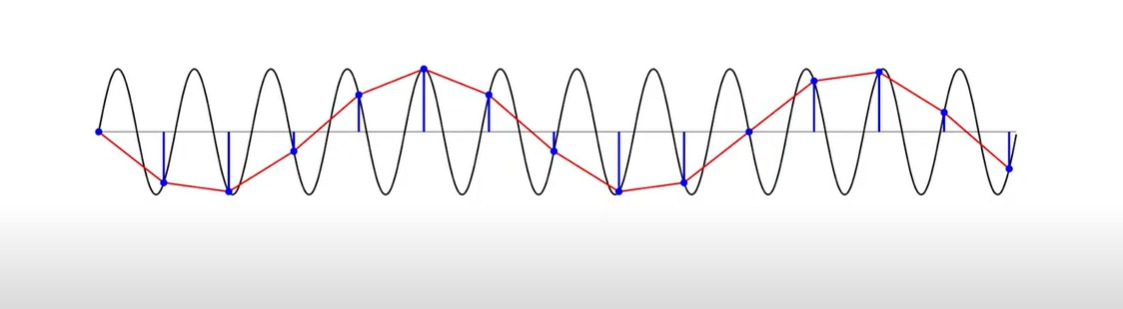

## Ejercicio 6

Genere una señal discreta con frecuencia de muestreo de 10 Hz y sobremuestreela, mediante distintos tipos de interpoladores, a 4 veces la frecuencia de muestreo. Para esto, implemente la siguiente ecuación de interpolación:

$$
x_i(mT_i) = \sum_n x(nT) \cdot I\left( \frac{mT_i - nT}{T} \right)
$$

Donde \(I\) es la función interpolante (la función sinc, por ejemplo). Observe que \(T\) representa el período de muestreo original y \(T_i\) el nuevo período de muestreo. Note además que \(n\) y \(m\) indican el número de muestra en la señal original e interpolada, respectivamente, y que, si bien aquí se expresan como señales analógicas, \(x\) y \(x_i\) serán señales discretas en su implementación (es decir, \(x_i[m]\) y \(x[n]\)).

Para la función sinc, tenga en cuenta la definición dada en el primer ejercicio, con \(f_s = 0.5\).


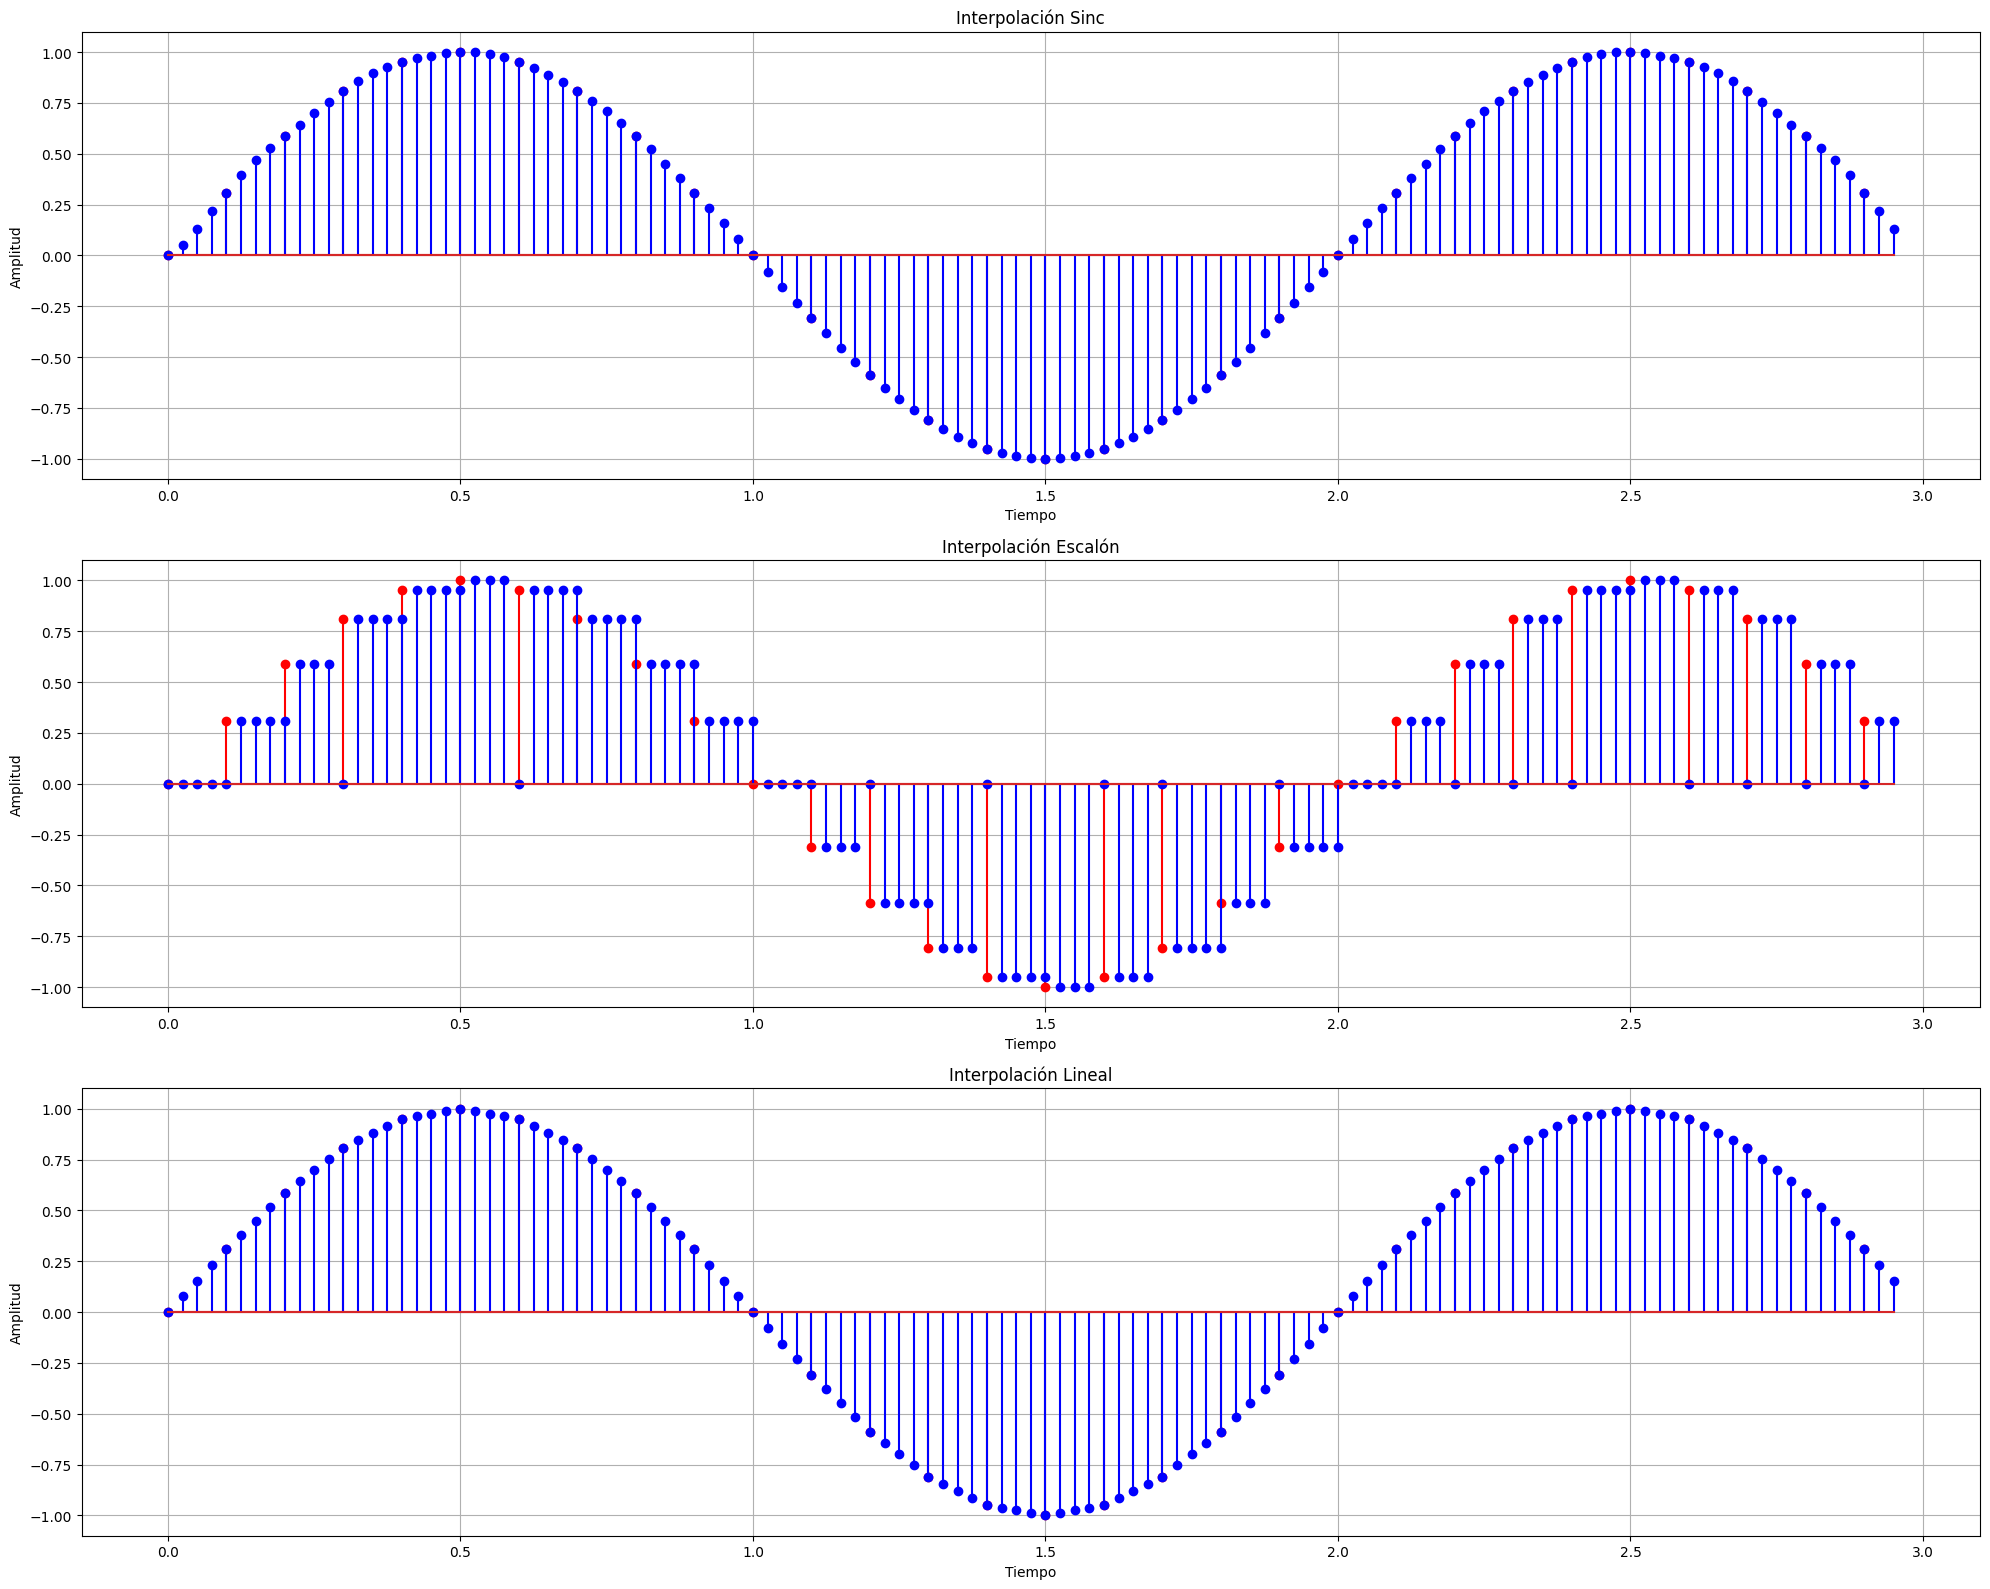

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones de interpolación
def sinc(fs,indice):
    x = 2*np.pi*fs*indice
    t = 0
    if x == 0:
        t = 1
    else:
        t = np.sin(x) / x
    return t

def lineal(indice):
    t = 0
    if np.abs(indice) < 1:
        t = 1 - np.abs(indice)
    return t

def escalon(indice):
    if (indice >= 1e-12 and indice <= 1):
        t = 1
    else:
        t = 0
    return t

# Función para generar la onda senoidal
def senoidal(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo, fase):
    t = np.arange(tiempo_inicial, tiempo_final, 1/frecuencia_muestreo)
    #T = 1/frecuencia_muestreo
    #t = np.linspace(tiempo_inicial, tiempo_final - T, (tiempo_final - tiempo_inicial)*frecuencia_muestreo)
    y = np.sin(2 * np.pi * frecuencia_senoidal * t + fase)
    return t, y

# Función unificada de interpolación
def interpolacion(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo, fase):
    # Genero la señal senoidal original
    to, yo = senoidal(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo, fase)

    # Período original
    T = 1 / frecuencia_muestreo

    # Sobremuestreo -> Se multiplica por 4 la cantidad de muestras
    n = 4

    # Período nuevo
    T_i = T / n

    # Tiempo discreto nuevo
    tn = np.arange(tiempo_inicial, tiempo_final - T_i, T_i)

    # Tamaño del tiempo nuevo
    m = len(tn)
    # Tamaño del tiempo original
    n = len(to)

    # Inicialización de las señales interpoladas
    xi_sinc = np.zeros(m)
    xi_escalon = np.zeros(m)
    xi_lineal = np.zeros(m)

    # Interpolación
    for i in range(len(tn)):
        for j in range(len(to)):
            indice = (tn[i] - to[j]) / T

            # Interpolador sinc
            xi_sinc[i] += yo[j] * sinc(frecuencia_senoidal, indice)

            # Interpolador escalon
            xi_escalon[i] += yo[j] * escalon(indice)

            # Interpolador lineal
            xi_lineal[i] += yo[j] * lineal(indice)

    return to, tn, yo ,xi_sinc, xi_lineal, xi_escalon


to, tn ,yo, x_sinc, x_lineal, x_escalon = interpolacion(tiempo_inicial=0, tiempo_final=3, frecuencia_senoidal=.5, frecuencia_muestreo=10, fase=0)

plt.figure(figsize=(20, 16))


plt.subplot(3, 1, 1)
plt.stem(to, yo, 'r-*', label="Original")
plt.stem(tn, x_sinc, 'b-o', label='Interpolador Sinc')
plt.title('Interpolación Sinc')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

plt.subplot(3, 1, 2)
plt.stem(to, yo, 'r-*', label="Original")
plt.stem(tn, x_escalon, 'b-o', label='Interpolador Escalón')
plt.title('Interpolación Escalón')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()


plt.subplot(3, 1, 3)
plt.stem(to, yo, 'r-*', label="Original")
plt.stem(tn, x_lineal, 'b-o', label='Interpolador Lineal')
plt.title('Interpolación Lineal')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

plt.tight_layout()
plt.show()
plt.show()


---
## Conclusiones ejercicio 6

 + La operacion de interpolacion es, de manera sintetizada, el proceso inverso a la discretizacion de las señales, si nosotros tendemos el numero de muestras en el cual vamos a sobremuestrar a infinito podriamos reconstruir la señal analogica cosa que claramente no se puede, pero de forma teorica si. La interpolacion se usa para lo que se conoce como proceso de remuestreo.

---

**Ejercicio 7: (∗)** Genere distintas realizaciones de una señal aleatoria con distribucin gaussiana (distribucin normal, equivalentemente) con media cero y varianza unitaria, y luego utilice dichas realizaciones para verificar la estacionariedad y la ergodicidad. Para esto tenga en cuenta que los estimadores estadósticos (media y varianza, en este caso) requieren infinitas muestras y realizaciones para obtener el valor exacto, por lo tanto deberá observarse
i los estimadores tienden al mismo valor a medida que se incrementan la cantidad de muestras y realizaciones


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def aleatorio(n_cant_muestras, m_cant_realizaciones, media=0, varianza=1):
    realizaciones = np.random.normal(loc=media, scale=np.sqrt(varianza), 
                                     size=(m_cant_realizaciones, n_cant_muestras))
    return realizaciones

def estimar(realizaciones):
    varianzas = np.var(realizaciones, axis=1) 
    medias = np.mean(realizaciones, axis=1)    
    return varianzas, medias

def verificar_estacionariedad(realizaciones):
    num_ventanas = 10  
    ventanas = np.array_split(realizaciones, num_ventanas, axis=1)  # Dividir las realizaciones en 10 ventanas
    medias_ventanas_estacionariedad = [np.mean(ventana) for ventana in ventanas]
    varianzas_ventanas_estacionariedad = [np.var(ventana) for ventana in ventanas]
    return medias_ventanas_estacionariedad, varianzas_ventanas_estacionariedad

def verificar_ergocidad(realizaciones):
    medias_realizaciones_ergocidad = np.mean(realizaciones, axis=1)
    varianzas_realizaciones_ergocidad = np.var(realizaciones, axis=1)
    return medias_realizaciones_ergocidad, varianzas_realizaciones_ergocidad


def prueba_con_parametros(n_cant_muestras, m_cant_realizaciones):
    print(f"Probando con {n_cant_muestras} muestras y {m_cant_realizaciones} realizaciones...\n")
    
    realizaciones = aleatorio(n_cant_muestras, m_cant_realizaciones, media=0, varianza=1)
    varianzas, medias = estimar(realizaciones)
    medias_ventanas_estacionariedad, varianzas_ventanas_estacionariedad = verificar_estacionariedad(realizaciones)
    medias_realizaciones_ergocidad, varianzas_realizaciones_ergocidad = verificar_ergocidad(realizaciones)

    
    indices_a_graficar = [0, 1, 2, m_cant_realizaciones - 1]  

    fig, axes = plt.subplots(4, 2, figsize=(25, 8 * 4)) 
    for i, idx in enumerate(indices_a_graficar):
        # Graficar la realización
        axes[i, 0].plot(realizaciones[idx], label=f'Realización {idx + 1}')
        axes[i, 0].set_title(f'Realización {idx + 1} de la función aleatoria')
        axes[i, 0].set_xlabel('Muestras')
        axes[i, 0].set_ylabel('Amplitud')
        axes[i, 0].legend()

        # Graficar la media acumulada
        medias_acumuladas = np.cumsum(realizaciones[idx]) / np.arange(1, n_cant_muestras + 1)
        axes[i, 1].plot(medias_acumuladas, label=f'Media acumulada de la realización {idx + 1}')
        axes[i, 1].axhline(y=0, color='r', linestyle='--', label='Media teórica (0)')
        axes[i, 1].set_title(f'Media acumulada de la realización {idx + 1}')
        axes[i, 1].set_xlabel('Muestras')
        axes[i, 1].set_ylabel('Media acumulada')
        axes[i, 1].legend()
        
    

    num_ventanas = 10
    ventanas = np.array_split(realizaciones, num_ventanas, axis=1)  
    varianzas_ventanas = [np.var(ventana, axis=1) for ventana in ventanas] 
    varianzas_ventanas_promedio = np.mean(varianzas_ventanas, axis=0)  

    # Crear la figura para la varianza
    fig2, ax2 = plt.subplots(figsize=(20, 8))
    ax2.plot(varianzas_ventanas_promedio, label='Varianza promedio por ventana', marker='o')
    ax2.axhline(y=1, color='g', linestyle='--', label='Varianza teórica (1)')
    ax2.set_title('Varianza promedio por ventana')
    ax2.set_xlabel('Ventanas')
    ax2.set_ylabel('Varianza')
    ax2.legend()
    
    
    
    plt.tight_layout()
    plt.show()

for n_muestras, m_realizaciones in [(3000, 3), (4000, 100), (5000, 100), (6000, 100), (20000, 10)]:
    prueba_con_parametros(n_muestras, m_realizaciones)